In [47]:
import numpy as np
import random
from scipy.stats import multivariate_normal
from matplotlib import pyplot as plt

In [26]:
def generate_pi_range(K, n):
    cuts = np.zeros(K-1)
    for i in range(K-1):
        cuts[i] = random.randrange(0, n)
    pi_range = np.sort(cuts)
    pi_range = np.append(pi_range,n)
    for i in range(K-1,0, -1):
        pi_range[i] = int(pi_range[i] - pi_range[i-1])
    pi_range = [int(x) for x in pi_range]
    return pi_range

In [85]:
K = 5
p = 20
n = 100000
mu_interval = [-5, 5]
cov_interval = [-2, 2]

pi_range = generate_pi_range(K,n)
pi = [x/sum(pi_range) for x in pi_range]

sigma = np.random.random((K, p, p))*(cov_interval[1] - cov_interval[0])+cov_interval[0]
for i in range(K):
    sigma_i = sigma[i]
    sigma[i] = np.dot(sigma_i,sigma_i.transpose())

mu = np.random.random((K,p))*(mu_interval[1] - mu_interval[0]) + mu_interval[0]
data = []
data = np.zeros((n,p))

for i in range(K):
    mu_i = mu[i,:]
    sigma_i = sigma[i,:,:]
    rv = multivariate_normal(mean = mu_i, cov = sigma_i)
    start_index = sum(pi_range[:i])
    stop_index = sum(pi_range[:i+1])
    generated_data = np.array(rv.rvs(size = pi_range[i]))
    data[start_index:stop_index] = generated_data



[37603, 7044, 16267, 17399, 21687]
[0.37603, 0.07044, 0.16267, 0.17399, 0.21687]


In [60]:
print(sigma)
print(mu)

[[[1.92467118]]]
[[1.57704064]]


In [95]:
y_temp = np.zeros((n,K))

for i in range(K):
    mu_i = mu[i,:]
    sigma_i = sigma[i,:,:]
    rv = multivariate_normal.pdf(data, mean = mu_i, cov = sigma_i)
    y_temp[:,i] = rv
print(y_temp.shape)
print()

(100000, 5)


[1, 1]


In [3]:
import numpy as np
import random
from scipy.stats import multivariate_normal
from matplotlib import pyplot as plt

In [4]:
def generate_pi_range(K, n):
    cuts = np.zeros(K-1)
    for i in range(K-1):
        cuts[i] = random.randrange(0, n)
    pi_range = np.sort(cuts)
    pi_range = np.append(pi_range,n)
    for i in range(K-1,0, -1):
        pi_range[i] = int(pi_range[i] - pi_range[i-1])
    pi_range = [int(x) for x in pi_range]
    return pi_range

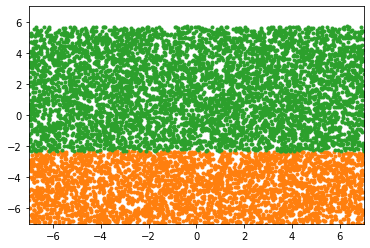

In [477]:
K = 4
p = 2
n = 10000
interval = [-7.0, 7.0]
intervals = np.array([interval for i in range(p)])

nr_splits = 10
splits = np.zeros((nr_splits,2))
data = np.zeros((n,p))
classes = np.zeros((n,1))
split_range = generate_pi_range(nr_splits,n)

for i in range(n):
    data[i,:] = np.random.random(p)*(intervals[:,0] - intervals[:,1])+ intervals[:,1]


coloured = np.zeros((n,1))

for i in range(nr_splits):
    feat = random.randrange(0,p)
    place = np.random.random(1)*(intervals[feat,0] - intervals[feat,1])+ intervals[feat,1]
    splits[i,0] = place
    splits[i,1] = feat
    
    c = int(random.randrange(0,K+1))
    side = int(random.randrange(0,2))
    
    #side = 1 => the area above the curve is filled with points
    if side == 1:
        pnts = np.argwhere(data[:,feat] >= place)[:,0]
    elif side == 0:
        pnts = np.argwhere(data[:,feat] < place)[:,0]
          
    for j in pnts:
        if(coloured[j] == 0):
            classes[j] = c
            coloured[j] = 1
        



if(p == 2):
    for i in range(nr_splits):
        if(int(splits[i,1]) == 0):
            splitlines = [np.ones(n)*splits[i][0], np.linspace(interval[0], interval[1], n)]
        else:
            splitlines = [np.linspace(interval[0], interval[1], n), np.ones(n)*splits[i][0]]
            
        #plt.plot(splitlines[0], splitlines[1], color = 'black')

    
    #plt.plot(data[:,0], data[:,1], '.')
    
    for i in range(K):
        indexes = np.argwhere(classes == i)[:,0]
        plt.plot(data[indexes,0], data[indexes,1],'.') 
        
    
    plt.xlim(interval)
    plt.ylim(interval)
  